In [1]:
# import necessary libraries
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib.pyplot as plt



def dSigmoid(x):
    return np.exp(x)/ (1.0 + np.exp(x))**2

def sigmoid(x):
    return 1.0/ (1.0 + np.exp(-x))

![image.png](img2.png)

![image.png](img1.png)

#### Forward Computation (Vectorized Equations) :



$$ Z^l = (W^l)^T . a^{l-1} + b^l$$
Here $ a^0 = X^T ; a^l = \sigma '(Z^l) $


Loss for $ X_n$ $$ Loss_n = \frac{1}{2} \sum_{k=1}^C (y_k - a_k^L)^2$$  

#### Backprogation (Vectorized Equations) :
$$\delta^ l = W^{l+1} . \delta^{l+1} \oplus \sigma'(Z^{l}) $$ where $ \delta^ l = \frac{\delta Loss}{\delta Z^{l}}$ and $\oplus $ denotes elementwise multiplication 


$$ \delta^L = (a^{L} - y^{L}) \oplus \sigma'(Z^{L})$$ where $L$ is the last layer


$$ \frac{ \delta Loss}{\delta b^l} = \delta^l$$


$$ \frac{\delta Loss}{\delta W^l} = a^{l-1} . (\delta ^l)^T $$



![image.png](img3.png)

In [2]:
class Neural_Network:
    def __init__(self):
        # Network dimensions
        self.W = []
        self.A = []
        self.Z = []
        self.b = []
        self.layers = 0
        self.input_nodes = 0
        
    def __str__(self):
        return "W = {} \nA = {} \nZ = {}\nb = {}\nlayers = {} \ninput_nodes = {}".format(self.W, self.A,
                                                                                         self.Z,self.b,self.layers,
                                                                                         self.input_nodes)
        
    def add_input_layer(self,n_nodes):
        if(self.layers==0):
            self.input_nodes = n_nodes
        else:
            print("Input layer is present")
            
    def add_output_layer(self,n_nodes):
        self.add_layer(n_nodes)
        
    def add_layer(self,n_nodes):
        if(self.layers == 0):
            Wnew = np.random.randn(self.input_nodes, n_nodes) 
            
        else:
            Wnew = np.random.randn(self.W[self.layers - 1].shape[1], n_nodes)
        self.W.append(Wnew)
        self.b.append(np.zeros((n_nodes, 1)))
        self.layers += 1
        


    def forward(self, X):
        """ Forward computation """
        self.Z = []
        self.A = []
        self.Z.append(np.dot(self.W[0].T,X) + self.b[0])
        self.A.append(sigmoid(self.Z[0]))
        
        for l in range(1,self.layers):
            self.Z.append(np.dot(self.W[l].T,self.A[l-1]) + self.b[l])
            self.A.append(sigmoid(self.Z[l]))
                          
        
    
    def back_prop(self,  X, Y):
        """ Back-progagate gradient of the loss """
        m = X.shape[1]
        self.dZ = []
        self.dW = []
        self.db = []
        L = self.layers - 1 
        self.dZ.insert(0,np.multiply(np.subtract(self.A[L] , Y),dSigmoid(self.Z[L])))
        self.dW.insert(0,(1 / m) * np.dot(self.A[L-1],self.dZ[0].T)) 
        self.db.insert(0,(1 / m) * np.sum(self.dZ[0], axis=1, keepdims=True)) 
        
        for l in range(L -1 , 0,-1):
            self.dZ.insert(0, np.multiply(np.dot(self.W[l+1], self.dZ[0]),dSigmoid(self.Z[l])))
            self.dW.insert(0, (1 / m) * np.dot(self.A[l-1],self.dZ[0].T))
            self.db.insert(0, (1 / m) * np.sum(self.dZ[0], axis=1, keepdims=True))
        
        self.dZ.insert(0,np.multiply(np.dot(self.W[1], self.dZ[0]),dSigmoid(self.Z[0])))
        self.dW.insert(0,(1 / m) * np.dot(X,self.dZ[0].T))
        self.db.insert(0,(1 / m) * np.sum(self.dZ[0], axis=1, keepdims=True)) 
        


    def train(self, X, Y, epochs, learning_rate=1.2):
        """ Complete process of learning, alternates forward pass,
            backward pass and parameters update """
        self.losses = []
        m = X.shape[0]
        for e in range(epochs):
            self.forward(X.T)
            L = self.layers -1
            loss =np.sum(np.subtract(Y.T,self.A[L])**2)/ m
            self.back_prop(X.T, Y.T)
            self.losses.append(loss)
            
            for l in range(L+1):

                self.W[l] -= learning_rate * self.dW[l]
                self.b[l] -= learning_rate * self.db[l]
            if e % 1000 == 0:
                print("Loss ",  e+1, " = ", loss)

    def predict(self, X):
        """ Compute predictions with just a forward pass """
        self.forward(X.T)
        return np.round(self.A[self.layers - 1].T).astype(np.int)

(2000, 2)
(2000, 1)


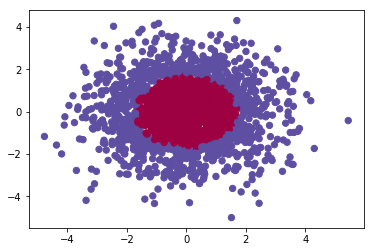

In [3]:
N = 2000
def load_data():
    
    gq = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=2.0,
                                                  n_samples=N, n_features=2,
                                                  n_classes=2, shuffle=True,
                                                  random_state=None)
    return gq

    
gaussian_quantiles = load_data()
X, Y = gaussian_quantiles


# Input Data
plt.figure("Input Data")
plt.scatter(X[:, 0], X[:, 1], c=Y, s=40, cmap=plt.cm.Spectral)

Y = Y.reshape(N,1)
print(X.shape)
print(Y.shape)



Loss  1  =  0.256398498697815
Loss  1001  =  0.11410756438424678
Loss  2001  =  0.05320119621788507
Loss  3001  =  0.040710874277462956
Loss  4001  =  0.034589663680737674
Loss  5001  =  0.03075110051083145
Loss  6001  =  0.02806294249900897
Loss  7001  =  0.026068050943416233
Loss  8001  =  0.024533103637693066
Loss  9001  =  0.023319186604297742


Text(0.5,1,'Loss v/s Epoch')

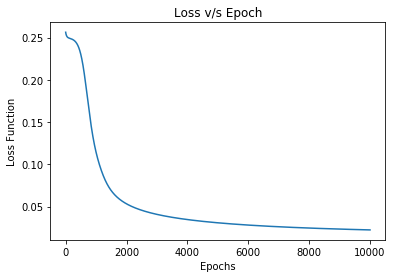

In [4]:
nn = Neural_Network()
nn.add_input_layer(X.shape[1])
nn.add_layer(5)
nn.add_output_layer(Y.shape[1])
nn.train(X, Y, 10000, 1.0)


plt.plot(range(len(nn.losses)),nn.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss Function")
plt.title("Loss v/s Epoch")